In [2]:
!pip install ipywidgets plotly


   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 882.6 kB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.2 MB 882.6 kB/s eta 0:00:02
   ------------------- -------------------- 1.0/2.2 MB 1.1 MB/s eta 0:00:02
   ---------------------------- ----------- 1.6/2.2 MB 1.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 1.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 1.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 1.4 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 932.3 kB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 1.0 MB/s eta 0:00:00
   -------------------------------

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [87]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

<class 'pandas.core.frame.DataFrame'>
Index: 230736 entries, 230736 to 461471
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      230736 non-null  datetime64[ns]
 1   y       230736 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23741 entries, 0 to 23740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      23741 non-null  datetime64[ns]
 1   y       23741 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 371.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      228 non-null    datetime64[ns]
 1   y       228 non-null    float64       
dtypes: datetime64[ns](1),

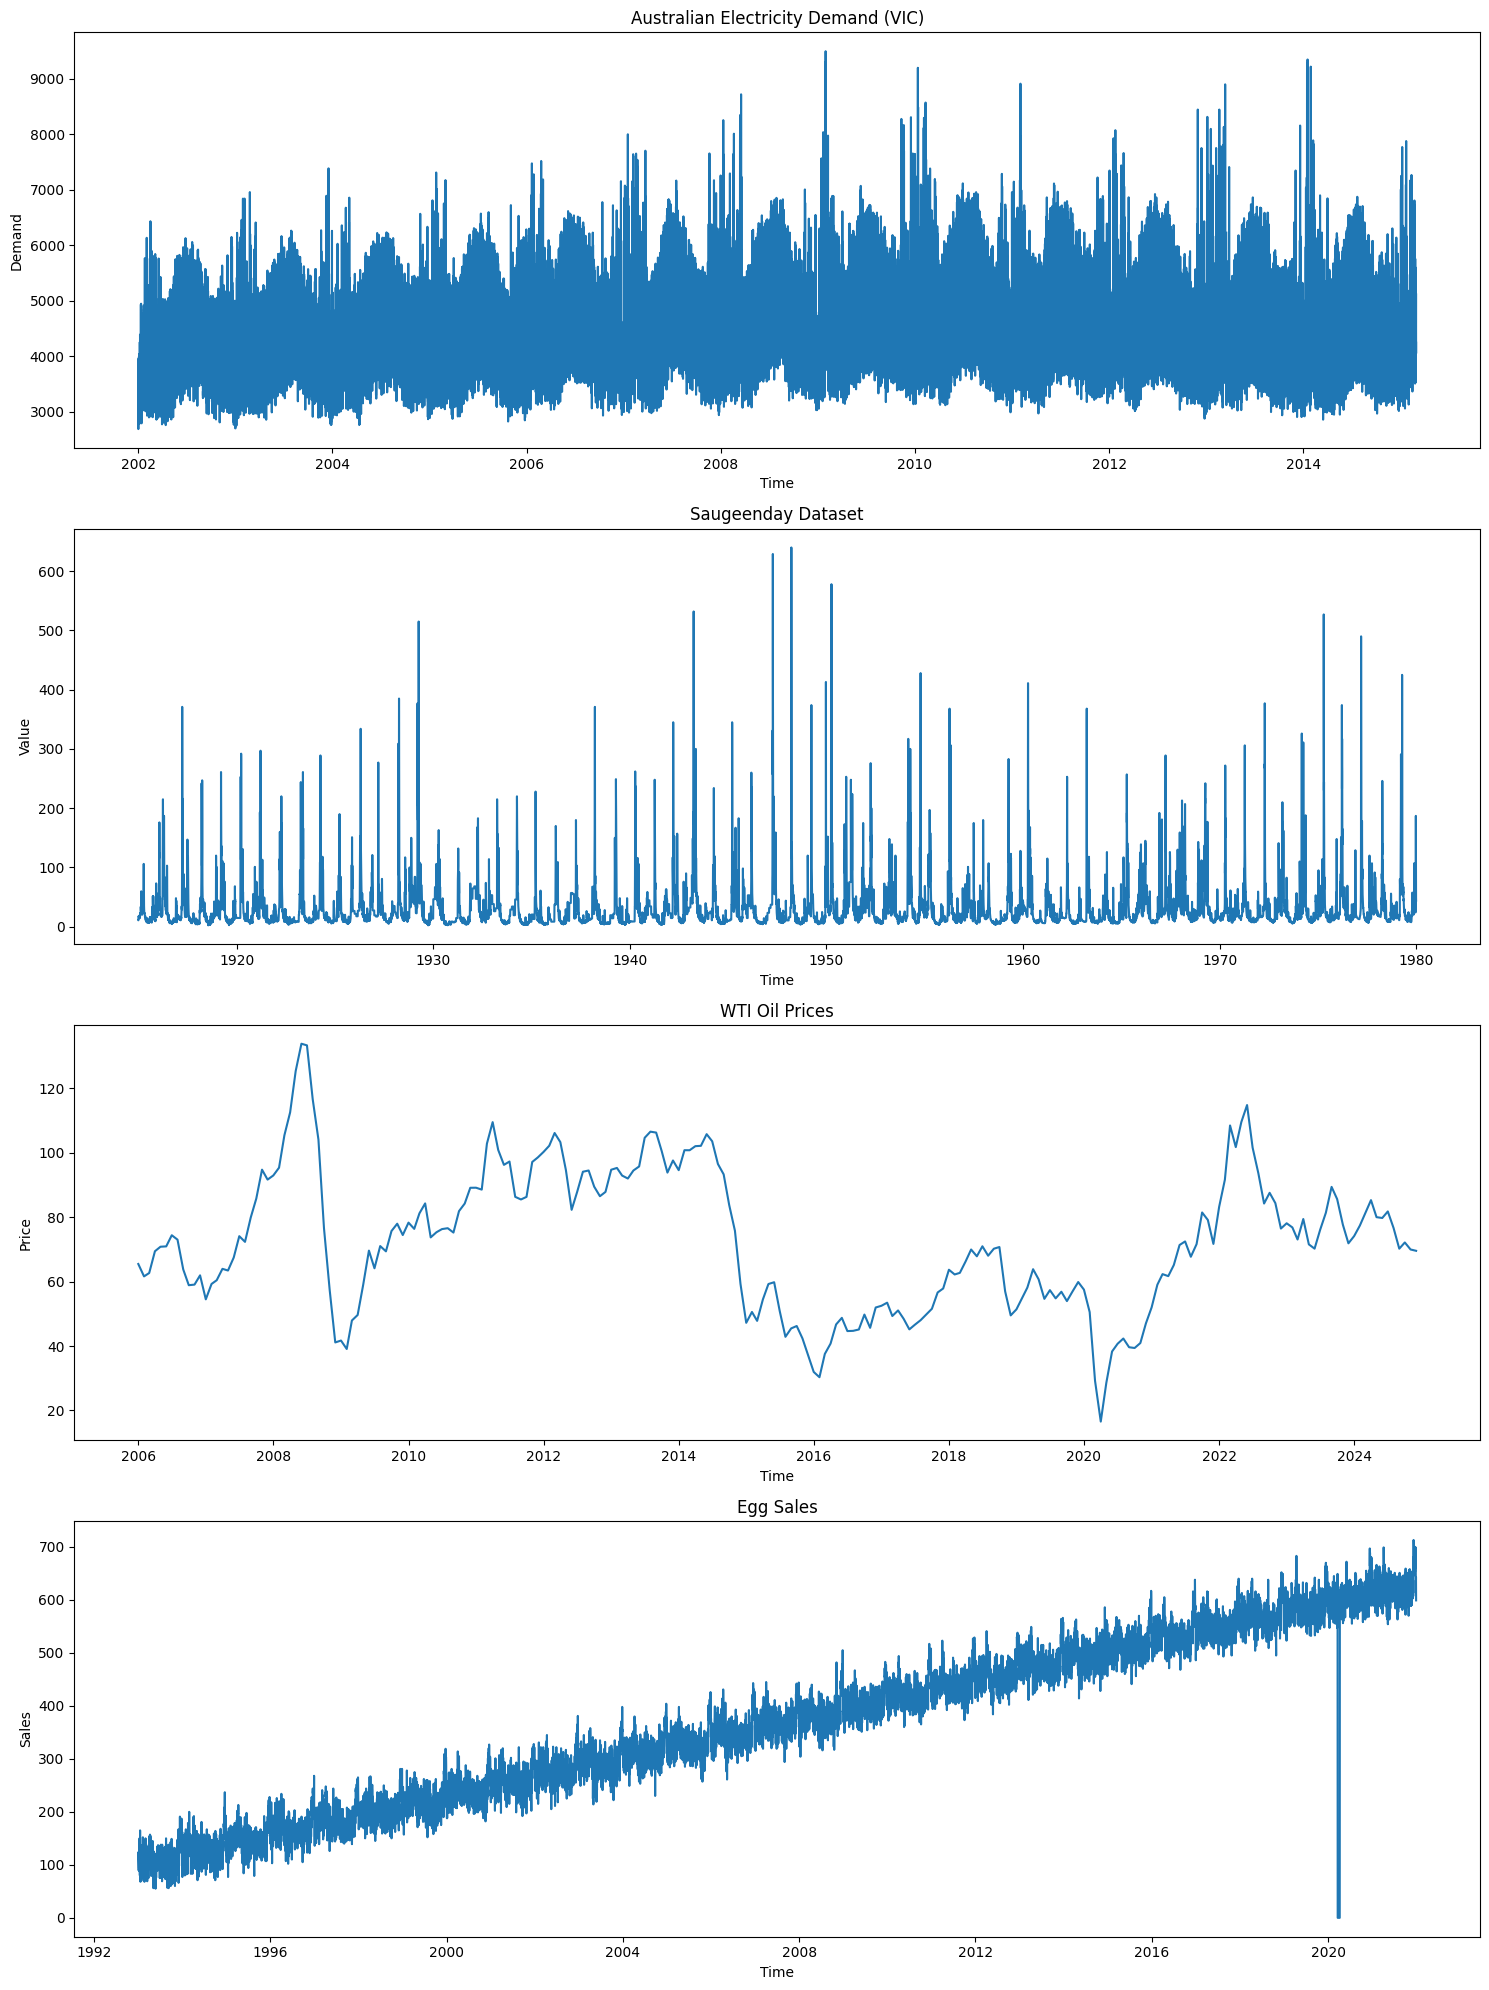

In [88]:
%run "datagetter.ipynb"

In [89]:
dataset_path = './Datasets/'
dataset_names = ['australian_electricity_demand_dataset.tsf','saugeenday_dataset.tsf', 'wti_oil_dataset.csv', 'train_egg_sales.csv']

## Apply Prophet for all Datasets

- Australian Eletricity Demand

In [164]:
# 1. Aggregate your half-hour data to daily sums (or means) for first dataset
daily = australian_electricity_demand_df.set_index('ds')['y'] \
          .resample('D').sum() \
          .reset_index().rename(columns={'y':'y'})

# 2. Split off the last 365 days
train_australian = daily[:-365]
test_australian  = daily[-365:]

# 3. Fit & forecast 365 days ahead
m_australian = Prophet()
m_australian.fit(train_australian)

future_australian  = m_australian.make_future_dataframe(periods=365, freq='D')
forecast_australian = m_australian.predict(future_australian)

# 4. Merge on ds
forecast_test = forecast_australian[['ds','yhat','yhat_lower','yhat_upper']]
merged = pd.merge(test_australian, forecast_test, on='ds', how='left')

# 5. Inspect
merged[['ds','y','yhat']].tail()



12:01:16 - cmdstanpy - INFO - Chain [1] start processing
12:01:16 - cmdstanpy - INFO - Chain [1] done processing


,ds,y,yhat
360,2015-02-24,219349.577780,231885.975475
361,2015-02-25,229733.450578,232834.222723
362,2015-02-26,231272.914506,233375.551693
363,2015-02-27,228040.507264,228975.963415
364,2015-02-28,209672.593930,200919.409743


- Saugeenday River Dataset

In [247]:
# 1. Aggregate your half-hour data to daily sums (or means) for second dataset
daily = saugeen_river_df.set_index('ds')['y'] \
          .resample('D').sum() \
          .reset_index().rename(columns={'y':'y'})

# 2. Split off the last 365 days
train_saugeen = daily[:-365]
test_saugeen  = daily[-365:]

# 3. Fit & forecast 365 days ahead
m_saugeen = Prophet()
m_saugeen.fit(train_saugeen)

future_saugeen  = m_saugeen.make_future_dataframe(periods=365, freq='D')
forecast_saugeen = m_saugeen.predict(future_saugeen)

# 4. Merge on ds
forecast_test = forecast_saugeen[['ds','yhat','yhat_lower','yhat_upper']]
merged = pd.merge(test_saugeen, forecast_test, on='ds', how='left')

# 5. Inspect
merged[['ds','y','yhat']].head()

13:28:52 - cmdstanpy - INFO - Chain [1] start processing
13:29:02 - cmdstanpy - INFO - Chain [1] done processing


,ds,y,yhat
0,1979-01-01,28.0,27.964733
1,1979-01-02,42.0,27.672090
2,1979-01-03,37.0,27.464432
3,1979-01-04,33.0,27.402286
4,1979-01-05,31.0,27.545960


- WTI Oil Price .csv

In [211]:
from pandas.tseries.offsets import MonthEnd

wti_oil_df['ds'] = pd.to_datetime(wti_oil_df['ds']) + MonthEnd(1)

wti_oil_df.head()







,ds,y
0,2006-02-28,65.485000
1,2006-03-31,61.631053
2,2006-04-30,62.685217
3,2006-05-31,69.443684
4,2006-06-30,70.844091


In [212]:

train_oil = wti_oil_df[:-365]
test_oil = wti_oil_df[-365:]



In [216]:
future_oil = m_oil.make_future_dataframe(periods=365, freq='D')
forecast_oil = m_oil.predict(future_oil)

forecast_oil[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
498,2018-05-28,39.345786,18.537948,62.070334
499,2018-05-29,38.595001,17.777907,60.257573
500,2018-05-30,37.772362,16.262097,60.376222
501,2018-05-31,36.896802,15.402323,58.739724
502,2018-06-01,35.988958,14.876681,56.711382


In [185]:
test_oil[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_oil[['yhat', 'yhat_lower', 'yhat_upper']]
test_oil.head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2006-01-31,65.485000,64.906785,43.142230,87.238450
1,2006-02-28,61.631053,66.046909,43.974905,87.001252
2,2006-03-31,62.685217,69.815438,49.673899,91.894665
3,2006-04-30,69.443684,73.678359,52.232671,95.233220
4,2006-05-31,70.844091,74.698529,53.845124,95.334193


In [197]:
all_data = pd.concat([train_oil, test_oil]).set_index('ds')['y']
# Rolling walk Window Baseline
test_oil['baseline_rw'] = test_oil['ds'].shift(1).map(all_data).values
test_oil.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline_rw
0,2006-01-31,65.485000,64.906785,43.142230,87.238450,NaN
1,2006-02-28,61.631053,66.046909,43.974905,87.001252,65.485000
2,2006-03-31,62.685217,69.815438,49.673899,91.894665,61.631053
3,2006-04-30,69.443684,73.678359,52.232671,95.233220,62.685217
4,2006-05-31,70.844091,74.698529,53.845124,95.334193,69.443684


## MAE

In [203]:
from sklearn.metrics import mean_absolute_error

# 1. Build a mask for rows where both yhat and baseline_rw are finite
mask_prophet  = test_oil['yhat'].notna()
mask_baseline = test_oil['baseline_rw'].notna()

# 2. Compute Prophet MAE only on rows with forecasts
prophet_mae = mean_absolute_error(
    test_oil.loc[mask_prophet, 'y'],
    test_oil.loc[mask_prophet, 'yhat']
)

# 3. Compute Baseline MAE only on rows with baseline
baseline_mae = mean_absolute_error(
    test_oil.loc[mask_baseline, 'y'],
    test_oil.loc[mask_baseline, 'baseline_rw']
)

print(f"Prophet MAE : {prophet_mae:.3f}")
print(f"Baseline MAE: {baseline_mae:.3f}")


Prophet MAE : 18.561
Baseline MAE: 4.817


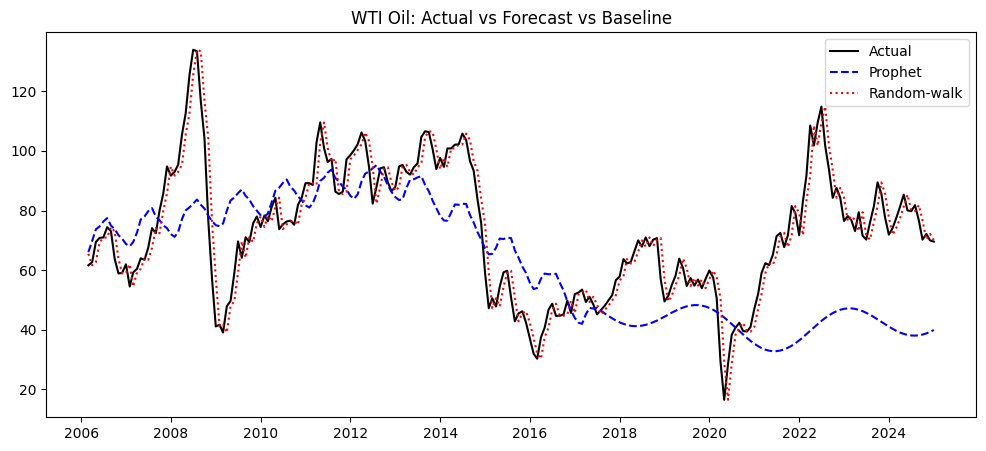

In [204]:
import matplotlib.pyplot as plt

mask = test_oil['yhat'].notna() & test_oil['baseline_rw'].notna()

plt.figure(figsize=(12,5))
plt.plot(test_oil.loc[mask,'ds'], test_oil.loc[mask,'y'],    'k-',  label='Actual')
plt.plot(test_oil.loc[mask,'ds'], test_oil.loc[mask,'yhat'], 'b--', label='Prophet')
plt.plot(test_oil.loc[mask,'ds'], test_oil.loc[mask,'baseline_rw'], 'r:', label='Random‐walk')
plt.legend(); plt.title('WTI Oil: Actual vs Forecast vs Baseline')
plt.show()


## MAPE

In [208]:
from sklearn.metrics import mean_absolute_percentage_error

# 1. Mask of rows where baseline is not NaN
mask_baseline = test_oil['baseline_rw'].notna()

# 2. Compute baseline MAPE only on those rows
baseline_mape = mean_absolute_percentage_error(
    test_oil.loc[mask_baseline, 'y'],
    test_oil.loc[mask_baseline, 'baseline_rw']
) * 100

# 3. (Similarly) mask out any NaNs in your Prophet forecast
mask_prophet = test_oil['yhat'].notna()
prophet_mape = mean_absolute_percentage_error(
    test_oil.loc[mask_prophet, 'y'],
    test_oil.loc[mask_prophet, 'yhat']
) * 100

print(f"Prophet MAPE : {prophet_mape:.1f}%")
print(f"Baseline MAPE: {baseline_mape:.1f}%")


Prophet MAPE : 26.7%
Baseline MAPE: 7.5%


- Eggs Sale

In [230]:

# 1. Ensure your ds column is datetime and sort
egg_sales_df['ds'] = pd.to_datetime(egg_sales_df['ds'])
egg_sales_df = egg_sales_df.sort_values('ds').reset_index(drop=True)

# 2. Split off the last 365 days for testing
train_egg_sales = egg_sales_df.iloc[:-365].copy()
test_egg_sales  = egg_sales_df.iloc[-365:].copy()

# Inspect
print("Train range:", train_egg_sales['ds'].min(), "to", train_egg_sales['ds'].max())
print("Test  range:", test_egg_sales ['ds'].min(), "to", test_egg_sales ['ds'].max())
train_egg_sales.head()


Train range: 1993-01-31 00:00:00 to 2021-01-31 00:00:00
Test  range: 2021-01-31 00:00:00 to 2022-01-31 00:00:00


,ds,y
0,1993-01-31,91
1,1993-01-31,126
2,1993-01-31,105
3,1993-01-31,120
4,1993-01-31,70


In [234]:

# 3. Instantiate and fit Prophet
m_egg_sales = Prophet(
    daily_seasonality=False,    # assume monthly egg sales
    weekly_seasonality=True,
    yearly_seasonality=True
)
m_egg_sales.fit(train_egg_sales[['ds','y']].rename(columns={'y':'y'}))

# 4. Use test ds as “future” DataFrame
future = test_egg_sales[['ds']].copy()
forecast = m_egg_sales.predict(future)

# 5. Keep only the columns you need
forecast_small = forecast[['ds','yhat','yhat_lower','yhat_upper']]
forecast_small.tail()

13:16:09 - cmdstanpy - INFO - Chain [1] start processing
13:16:10 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
360,2021-12-31,646.714585,605.986486,686.594458
361,2021-12-31,646.714585,602.346061,690.819688
362,2021-12-31,646.714585,602.083684,686.990094
363,2021-12-31,646.714585,603.813743,690.918542
364,2022-01-31,617.716082,575.273606,659.880504


In [235]:
# 6. Merge forecast into test set (align on ds)
test_egg_sales = test_egg_sales.merge(
    forecast_small,
    on='ds',
    how='left'
)

# 7. Last‐value baseline: predict every test point as last train y
last_val = train_egg_sales['y'].iloc[-1]
test_egg_sales['baseline_last'] = last_val

# 8. Random‐walk baseline: previous actual
all_data = pd.concat([train_egg_sales, test_egg_sales]).drop_duplicates('ds', keep='last').set_index('ds')['y']
test_egg_sales['baseline_rw'] = test_egg_sales['ds'].shift(1).map(all_data)

test_egg_sales.head(10)



,ds,y,yhat,yhat_lower,yhat_upper,baseline_last,baseline_rw
0,2021-01-31,628,603.043192,559.151962,644.314336,613,NaN
1,2021-01-31,628,603.043192,558.168529,645.304751,613,603.0
2,2021-01-31,628,603.043192,559.440452,643.866443,613,603.0
3,2021-01-31,628,603.043192,559.402905,642.838133,613,603.0
4,2021-01-31,628,603.043192,561.656131,647.548095,613,603.0
5,2021-01-31,628,603.043192,562.679900,646.435166,613,603.0
6,2021-01-31,628,603.043192,563.457109,647.726050,613,603.0
7,2021-01-31,628,603.043192,561.308682,647.008536,613,603.0
8,2021-01-31,628,603.043192,559.148954,646.976444,613,603.0
9,2021-01-31,628,603.043192,563.218456,643.572989,613,603.0


In [236]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Mask out any NaNs (first row of baseline_rw will be NaN)
mask = test_egg_sales['yhat'].notna() & test_egg_sales['baseline_rw'].notna()

prophet_mae   = mean_absolute_error(test_egg_sales.loc[mask,'y'], test_egg_sales.loc[mask,'yhat'])
baseline_last_mae = mean_absolute_error(test_egg_sales.loc[mask,'y'], test_egg_sales.loc[mask,'baseline_last'])
baseline_rw_mae   = mean_absolute_error(test_egg_sales.loc[mask,'y'], test_egg_sales.loc[mask,'baseline_rw'])

prophet_mape   = mean_absolute_percentage_error(test_egg_sales.loc[mask,'y'], test_egg_sales.loc[mask,'yhat'])*100
baseline_last_mape = mean_absolute_percentage_error(test_egg_sales.loc[mask,'y'], test_egg_sales.loc[mask,'baseline_last'])*100
baseline_rw_mape   = mean_absolute_percentage_error(test_egg_sales.loc[mask,'y'], test_egg_sales.loc[mask,'baseline_rw'])*100

print(f"Prophet MAE: {prophet_mae:.2f}, MAPE: {prophet_mape:.1f}%")
print(f"Last‐Value MAE: {baseline_last_mae:.2f}, MAPE: {baseline_last_mape:.1f}%")
print(f"Random‐Walk MAE: {baseline_rw_mae:.2f}, MAPE: {baseline_rw_mape:.1f}%")


Prophet MAE: 22.41, MAPE: 3.6%
Last‐Value MAE: 21.37, MAPE: 3.4%
Random‐Walk MAE: 23.21, MAPE: 3.8%


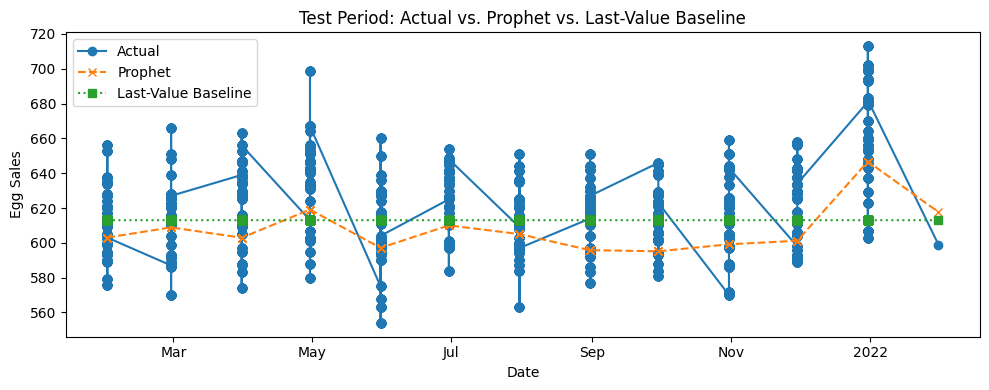

In [242]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Restrict to test period
df = test_egg_sales.copy()

fig, ax = plt.subplots(figsize=(10,4))

# Actuals
ax.plot(df['ds'], df['y'],            marker='o', linestyle='-',  lw=1.5, label='Actual')

# Prophet forecast
ax.plot(df['ds'], df['yhat'],         marker='x', linestyle='--', lw=1.5, label='Prophet')

# Last‐value baseline
ax.plot(df['ds'], df['baseline_last'], marker='s', linestyle=':', lw=1.5, label='Last‐Value Baseline')

# Formatting x‐axis
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax.set_xlabel('Date')
ax.set_ylabel('Egg Sales')
ax.set_title('Test Period: Actual vs. Prophet vs. Last‐Value Baseline')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()


## MAE

## Forecasting & Testing - Merge 1 Table

In [124]:
forecast_australian[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]


,ds,yhat,yhat_lower,yhat_upper
10227,2021-01-01,184473.132990,160121.782286,208469.934301
10228,2021-01-02,157630.336081,133791.814311,183184.923730
10229,2021-01-03,149148.558557,122911.869320,172222.686082
10230,2021-01-04,183824.281331,159037.234606,207869.665854
10231,2021-01-05,191011.175902,165095.056243,216095.147352


In [243]:
forecast_saugeen[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]

,ds,yhat,yhat_lower,yhat_upper
23376,1979-01-01,27.964733,-14.165098,68.965855
23377,1979-01-02,27.672090,-15.348479,66.350225
23378,1979-01-03,27.464432,-13.520162,68.979809
23379,1979-01-04,27.402286,-13.483671,65.995227
23380,1979-01-05,27.545960,-11.617738,67.486660


In [160]:
# WTI Oil 

In [209]:
forecast_egg_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]

,ds,yhat,yhat_lower,yhat_upper
10227,2021-01-01,611.663309,571.484127,653.543271
10228,2021-01-02,608.126697,567.709191,652.841785
10229,2021-01-03,605.359672,563.402371,650.459481
10230,2021-01-04,603.317733,560.841576,648.279147
10231,2021-01-05,600.516336,559.752626,641.994292


In [165]:
test_australian[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_australian[['yhat', 'yhat_lower', 'yhat_upper']]
test_australian.head()

,ds,y,yhat,yhat_lower,yhat_upper
4442,2014-03-01,193538.793410,203799.648497,184420.778617,220680.776589
4443,2014-03-02,183354.964932,193843.101368,174969.360524,212196.518349
4444,2014-03-03,228382.493082,226849.027481,209121.657339,243764.291693
4445,2014-03-04,255374.052196,232192.875886,214305.440545,251018.732023
4446,2014-03-05,233962.163338,232857.336335,216756.034708,250834.203276


In [244]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_saugeen[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
936,2023-12-10,NaN,10.999715,-30.300564,49.468890
937,2023-12-17,NaN,11.017554,-27.368567,54.392007
938,2023-12-24,NaN,11.205048,-27.303501,50.943723
939,2023-12-31,NaN,11.314771,-28.951276,49.495821
940,2024-01-07,74.152381,11.116573,-31.859796,51.657621


In [161]:
# WTI Oil



In [210]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_egg_sales[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
936,2023-12-10,NaN,144.526448,100.802600,184.383063
937,2023-12-17,NaN,145.165430,103.716692,188.928711
938,2023-12-24,NaN,144.688251,102.179310,186.487009
939,2023-12-31,NaN,144.092284,103.804460,188.131999
940,2024-01-07,74.152381,144.013292,102.237999,182.110903


## Compare Baseline

In [166]:
# last year of the training set is repeated as the forecast for next year.
test_australian['baseline'] = train_australian['y'][-365:].values
test_australian.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
4442,2014-03-01,193538.793410,203799.648497,184420.778617,220680.776589,210941.311608
4443,2014-03-02,183354.964932,193843.101368,174969.360524,212196.518349,187663.597444
4444,2014-03-03,228382.493082,226849.027481,209121.657339,243764.291693,190943.204714
4445,2014-03-04,255374.052196,232192.875886,214305.440545,251018.732023,248566.990326
4446,2014-03-05,233962.163338,232857.336335,216756.034708,250834.203276,261893.289828


## Metrics

In [168]:
from sklearn.metrics import mean_absolute_error

prophet_mae = mean_absolute_error(test_australian['y'], test_australian['yhat'])
baseline_mae = mean_absolute_error(test_australian['y'], test_australian['baseline'])

print(prophet_mae)
print(baseline_mae)

9838.789920511395
21108.25704319452


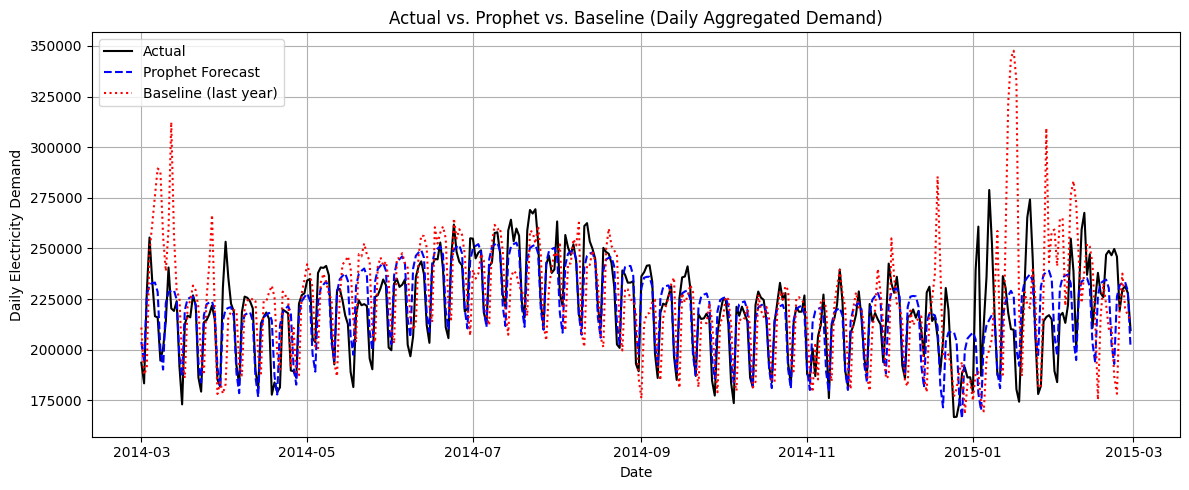

In [169]:
plt.figure(figsize=(12, 5))
plt.plot(test_australian['ds'], test_australian['y'],      'k-',  label='Actual')
plt.plot(test_australian['ds'], test_australian['yhat'],   'b--', label='Prophet Forecast')
plt.plot(test_australian['ds'], test_australian['baseline'],'r:', label='Baseline (last year)')

plt.title('Actual vs. Prophet vs. Baseline (Daily Aggregated Demand)')
plt.xlabel('Date')
plt.ylabel('Daily Electricity Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [170]:
from sklearn.metrics import mean_absolute_percentage_error

# Compute MAPE (as a percentage)
prophet_mape  = mean_absolute_percentage_error(test_australian['y'], test_australian['yhat'])  * 100
baseline_mape = mean_absolute_percentage_error(test_australian['y'], test_australian['baseline']) * 100

print(f'Prophet MAPE : {prophet_mape:.2f}%')
print(f'Baseline MAPE: {baseline_mape:.2f}%')

Prophet MAPE : 4.49%
Baseline MAPE: 9.72%


In [171]:
import plotly.express as px

# Make sure your `test` DataFrame has columns:
# ['ds','y','yhat','baseline']
# If you still have yhat_lower/upper you can leave those out for clarity here.

fig = px.line(
    test_australian, 
    x='ds', 
    y=['y','yhat','baseline'], 
    labels={
        'value': 'Daily Demand',
        'variable': 'Series'
    },
    title='Actual vs Prophet Forecast vs Last-Year Baseline'
)

# Turn on the range-slider for the x-axis
fig.update_layout(
    xaxis_rangeslider_visible=True,
    xaxis_title='Date',
    yaxis_title='Demand'
)

fig.show()